In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
%matplotlib inline
plt.rcParams['font.family'] = 'serif'

In [13]:
# constants
secondsPerDay = 86400
nx = 500
ny = 500

# plotting params
deepIndex = 35
yRange = np.linspace(-ny,ny,ny)
yRMeters = yRange*1000

# io params
loc = f"/scratch/hcm7920/ambData/levelMean/"
conc = ["0", "100"]
saveloc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"                                       

In [4]:
# load data

levs = np.load(loc+"../grid/gridLevs.npy")

timeDiags = np.load(loc+"../grid/gridTimeDiags.npy")
keLevMax = np.load(loc+"levelMaxKE.npy")
keLevMean = np.load(loc+"levelMeanKE.npy")

channelMeanU  = np.load(loc+"../channelMean/channelMeanU.npy")
channelMeanV  = np.load(loc+"../channelMean/channelMeanV.npy")
channelMeanKE = np.load(loc+"../channelMean/channelMeanKE.npy")


In [5]:
# calculate EKE and MKE

mKE = 0.5*(channelMeanU**2 + channelMeanV**2)
eKE = channelMeanKE - mKE


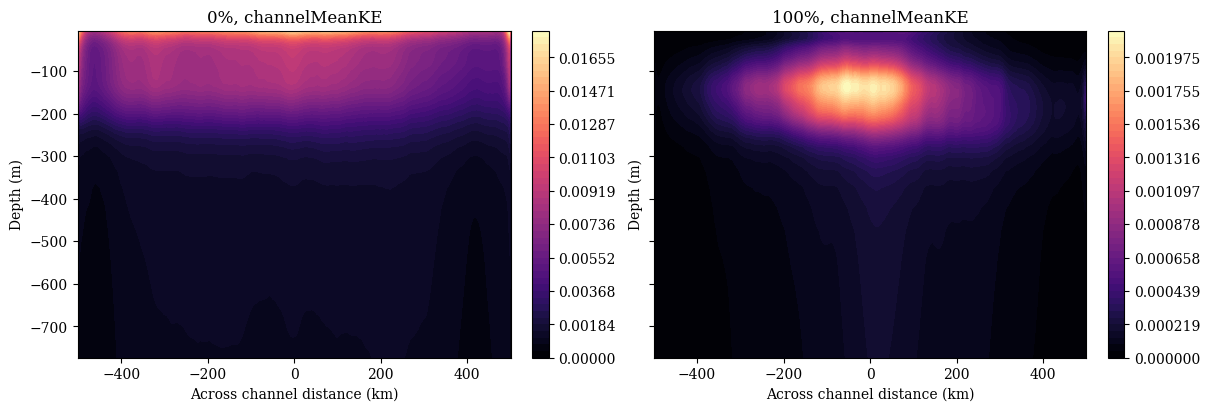

In [30]:
# make example plots

fig,ax = plt.subplots(1,2,sharey=True,
                     figsize=(12,4),
                     layout='constrained')

for ic in range(len(conc)):
  
  myMax = channelMeanKE[:,:,ic].max()
  contourLevels = np.linspace(0,myMax,50)
  im = ax[ic].contourf(yRange, levs[:deepIndex],
                      channelMeanKE[:deepIndex,:,ic],
                      contourLevels, cmap='magma')
  ax[ic].set_xlabel("Across channel distance (km)")
  ax[ic].set_ylabel("Depth (m)")
  ax[ic].set_title(f"{conc[ic]}%, channelMeanKE")
  plt.colorbar(im, ax=ax[ic])



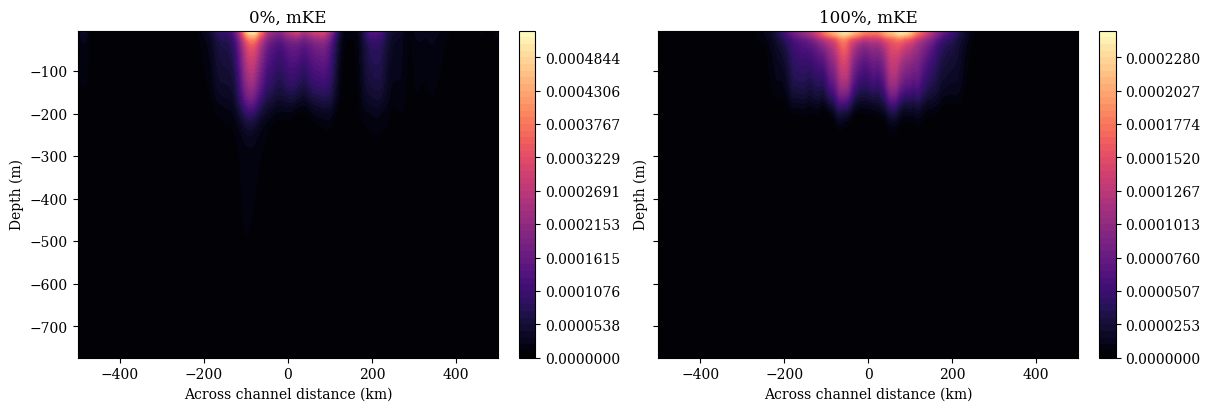

In [31]:
# make example plots

fig,ax = plt.subplots(1,2,sharey=True,
                     figsize=(12,4),
                     layout='constrained')

for ic in range(len(conc)):
  
  myMax = mKE[:,:,ic].max()
  contourLevels = np.linspace(0,myMax,50)
  im = ax[ic].contourf(yRange, levs[:deepIndex],
                      mKE[:deepIndex,:,ic],
                      contourLevels, cmap='magma')
  ax[ic].set_xlabel("Across channel distance (km)")
  ax[ic].set_ylabel("Depth (m)")
  ax[ic].set_title(f"{conc[ic]}%, mKE")
  plt.colorbar(im, ax=ax[ic])



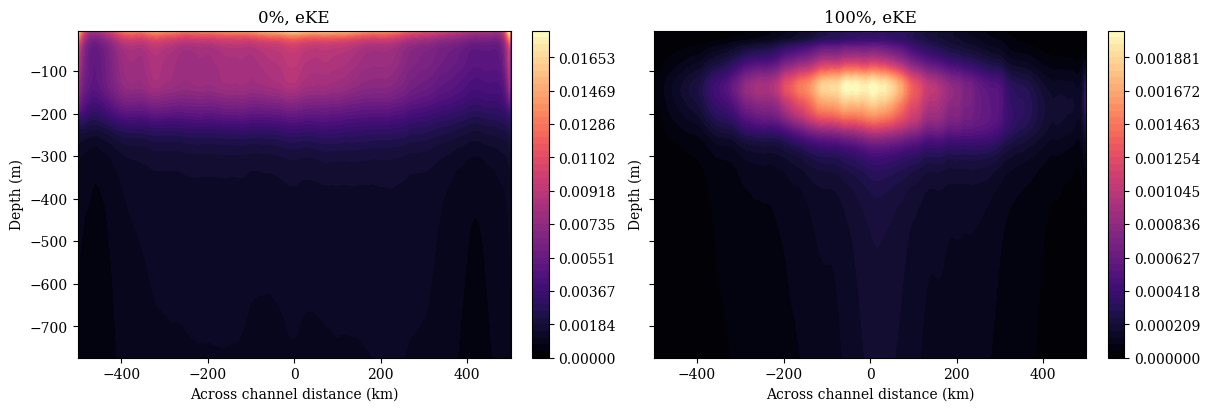

In [32]:
# make example plots

fig,ax = plt.subplots(1,2,sharey=True,
                     figsize=(12,4),
                     layout='constrained')

for ic in range(len(conc)):
  
  myMax = eKE[:,:,ic].max()
  contourLevels = np.linspace(0,myMax,50)
  im = ax[ic].contourf(yRange, levs[:deepIndex],
                      eKE[:deepIndex,:,ic],
                      contourLevels, cmap='magma')
  ax[ic].set_xlabel("Across channel distance (km)")
  ax[ic].set_ylabel("Depth (m)")
  ax[ic].set_title(f"{conc[ic]}%, eKE")
  plt.colorbar(im, ax=ax[ic])



Text(0.5, 1.0, 'Ice covered')

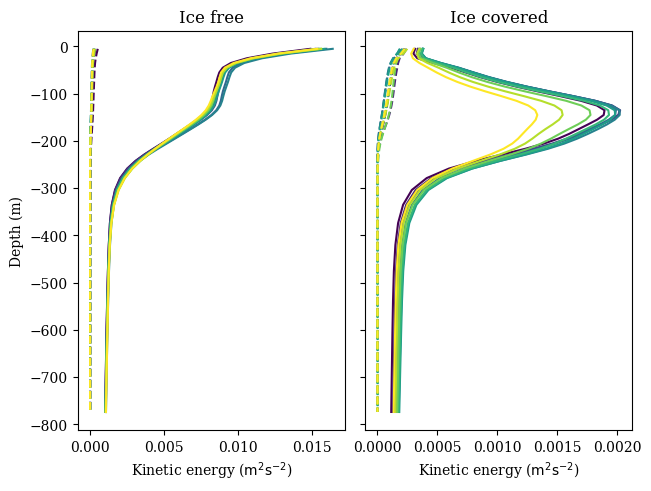

In [64]:
# profiles of KE, EKE, and MKE, testing for location

deepIndex = 35
pLocs = np.arange(210,310,10)
colors = plt.cm.viridis(np.linspace(0,1,10))
fig, ax = plt.subplots(1,2,sharey=True,
                      layout='constrained')

for ic in range(len(conc)):
  for ip in range(10):
    ax[ic].plot(eKE[:deepIndex,pLocs[ip],ic],
               levs[:deepIndex],
               color=colors[ip],
               linestyle='solid',
               label=f'Eddy KE {ip+1}')
    ax[ic].plot(mKE[:deepIndex,pLocs[ip],ic],
               levs[:deepIndex],
               color=colors[ip],
               linestyle='dashed',
               label=f'Mean KE {ip+1}')
  lbl1 = "Kinetic energy ($\mathrm{m}^2\mathrm{s}^{-2}$)"
  ax[ic].set_xlabel(lbl1)

ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Ice free")
ax[1].set_title("Ice covered")


In [ ]:
# profiles of mKE & eKE, official


